# Question 1.1

<Figure size 432x288 with 0 Axes>

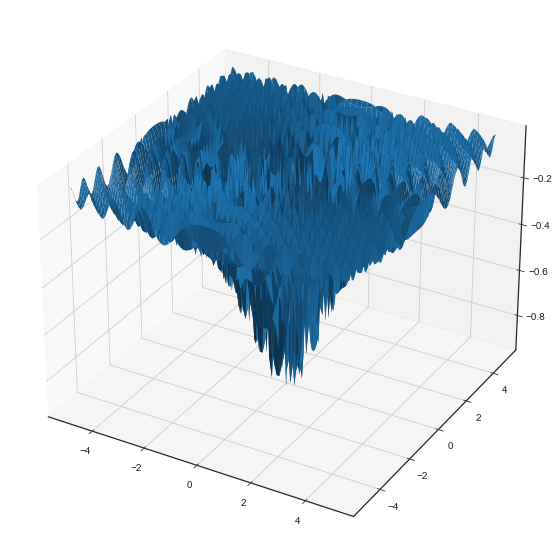

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = y = np.linspace(-5,5,100)
X, Y = np.meshgrid(x, y)
Z = (-1-np.cos(12*(X**2+Y**2)**0.5))/(0.5*(X**2+Y**2)+2)
ax.plot_surface(X, Y, Z)
plt.show()

# Question 1.2 GD

# For function 1 GD

0.265, 0.265, 100


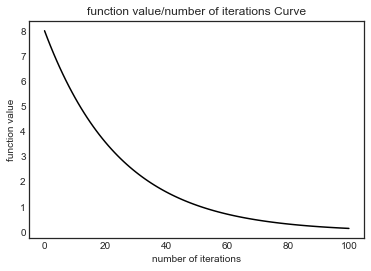

In [2]:
def f(x1, x2):
    return x1**2 + x2**2

def df_x1(x1, x2):
    return 2*x1

def df_x2(x1, x2):
    return 2*x2

x1, x2 = 2, 2
alpha =  0.01
num_ite = 0

# For Plot
dict_ite_f = {}
dict_ite_f[0] = f(x1, x2)

while(True):
    pre_result = f(x1, x2)
    x1, x2 = x1 - alpha * (df_x1(x1, x2)), x2 - alpha * (df_x2(x1, x2))
    result = f(x1, x2)
    num_ite += 1
    dict_ite_f[num_ite] = f(x1, x2)
    if num_ite == 100: break
    
print("{0:.3f}, {1:.3f}, {2}".format(x1, x2, num_ite))

# Plot
X = [key for key in dict_ite_f]
Y = [dict_ite_f[key] for key in dict_ite_f]
plt.plot(X, Y, color='k')
plt.xlabel("number of iterations")
plt.ylabel("function value")
plt.title("function value/number of iterations Curve")
plt.show()

# For function 2 GD

1.846, 1.846, 100, -0.369


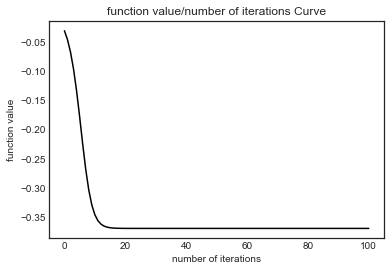

In [3]:
def f(x1, x2):
    return (-1-np.cos(12*(x1**2+x2**2)**0.5))/(0.5*(x1**2+x2**2)+2)

def df_x1(x_1, x_2):
    return (12*x_1*np.sin(12*np.sqrt(x_1**2+x_2**2)))/(np.sqrt(x_1**2+x_2**2)*((x_1**2+x_2**2)/2+2))-(x_1*(-np.cos(12*np.sqrt(x_1**2+x_2**2))-1))/((x_1**2+x_2**2)/2+2)**2

def df_x2(x_1, x_2):
    return (12*x_2*np.sin(12*np.sqrt(x_2**2+x_1**2)))/(np.sqrt(x_2**2+x_1**2)*((x_2**2+x_1**2)/2+2))-(x_2*(-np.cos(12*np.sqrt(x_2**2+x_1**2))-1))/((x_2**2+x_1**2)/2+2)**2

x1, x2 = 2, 2
alpha =  0.01
num_ite = 0

# For Plot
dict_ite_f = {}
dict_ite_f[0] = f(x1, x2)

while(True):
    pre_result = f(x1, x2)
    x1, x2 = x1 - alpha * (df_x1(x1, x2)), x2 - alpha * (df_x2(x1, x2))
    result = f(x1, x2)
    num_ite += 1
    dict_ite_f[num_ite] = f(x1, x2)
    if num_ite == 100: break
    
print("{0:.3f}, {1:.3f}, {2}, {3:.3f}".format(x1, x2, num_ite, f(x1, x2)))

# Plot
X = [key for key in dict_ite_f]
Y = [dict_ite_f[key] for key in dict_ite_f]
plt.plot(X, Y, color='k')
plt.xlabel("number of iterations")
plt.ylabel("function value")
plt.title("function value/number of iterations Curve")
plt.show()

# For function 3 GD

3.518
100


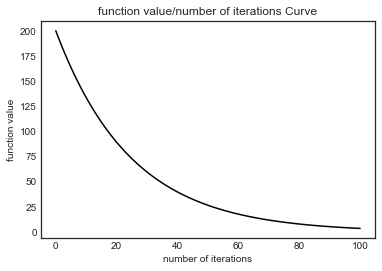

In [4]:
def f(X):
    result = 0
    for i in X:
        result += i**2
    return result

X = [2]*50
alpha =  0.01
num_ite = 0

# For Plot
dict_ite_f = {}
dict_ite_f[0] = f(X)

while(True):
    pre_result = f(X)
    for i in range(len(X)):
        X[i] = X[i] - alpha*2*X[i]
    result = f(X)
    num_ite += 1
    dict_ite_f[num_ite] = f(X)
    if num_ite == 100: break
    
print("{0:.3f}".format(f(X)))
print(num_ite)

# Plot
X = [key for key in dict_ite_f]
Y = [dict_ite_f[key] for key in dict_ite_f]
plt.plot(X, Y, color='k')
plt.xlabel("number of iterations")
plt.ylabel("function value")
plt.title("function value/number of iterations Curve")
plt.show()

# Question 1.3 SA

# For function 1 SA

T=10


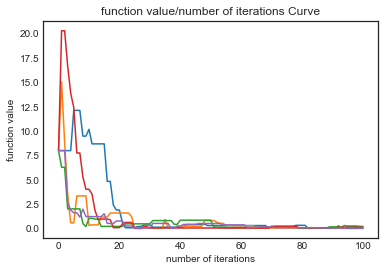

T=1000


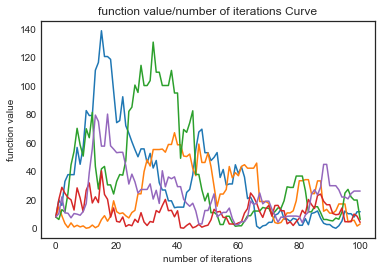

In [5]:
def prob(f1, f2, T, k):
    return np.exp((f1-f2)/(T/k))

def f(x1, x2):
    return x1**2 + x2**2

def SA(sd, temp):
    np.random.seed(sd)
    x1, x2 = 2, 2
    num_ite = 0
    T = temp
    # For Plot
    dict_ite_f = {}
    dict_ite_f[0] = f(x1, x2)
    while(True):
        pre_result = f(x1, x2)
        s = np.random.multivariate_normal([x1, x2], np.identity(2))
        cur_x1, cur_x2 = s[0], s[1]
        result = f(cur_x1, cur_x2)
        num_ite += 1
        if result>=pre_result and np.random.uniform(0,1)>prob(pre_result, result, T, num_ite):
            dict_ite_f[num_ite] = f(x1, x2)
        else:
            x1, x2 = cur_x1, cur_x2
            dict_ite_f[num_ite] = f(x1, x2)
        if num_ite == 100: break
    return dict_ite_f

def plot1(temp):
    for i in range(5):
        dic = SA(i, temp)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()

print("T=10")
plot1(10)
print("T=1000")
plot1(1000)

# For function 2 SA

T=10


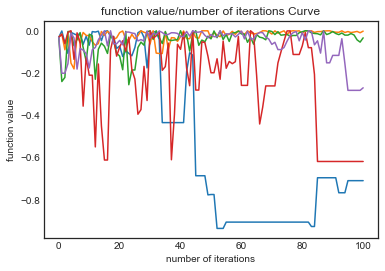

T=1000


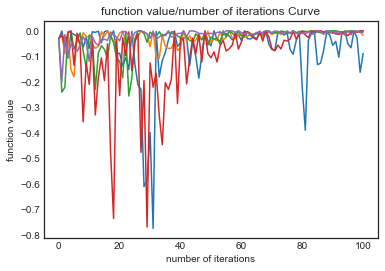

In [6]:
def f(x1, x2):
    return (-1-np.cos(12*(x1**2+x2**2)**0.5))/(0.5*(x1**2+x2**2)+2)

def SA(sd, temp):
    np.random.seed(sd)
    x1, x2 = 2, 2
    num_ite = 0
    T = temp
    # For Plot
    dict_ite_f = {}
    dict_ite_f[0] = f(x1, x2)
    while(True):
        pre_result = f(x1, x2)
        s = np.random.multivariate_normal([x1, x2], np.identity(2))
        cur_x1, cur_x2 = s[0], s[1]
        result = f(cur_x1, cur_x2)
        num_ite += 1
        if result>=pre_result and np.random.uniform(0,1)>prob(pre_result, result, T, num_ite):
            dict_ite_f[num_ite] = f(x1, x2)
        else:
            x1, x2 = cur_x1, cur_x2
            dict_ite_f[num_ite] = f(x1, x2)
        if num_ite == 100: break
    return dict_ite_f

def plot2(temp):
    for i in range(5):
        dic = SA(i, temp)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()

print("T=10")
plot2(10)
print("T=1000")
plot2(1000)

# For function 3 SA

T=10


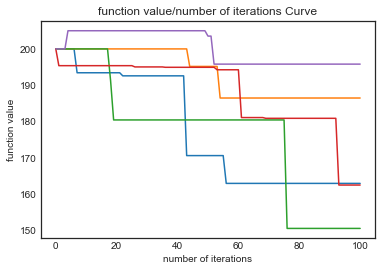

T=1000


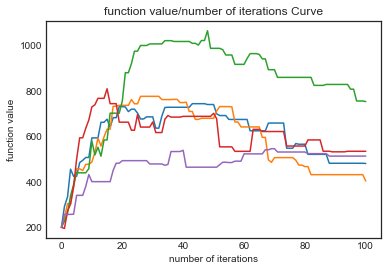

In [7]:
def f(X):
    result = 0
    for i in X:
        result += i**2
    return result

def SA(sd, temp):
    np.random.seed(sd)
    X = 2*np.ones(50)
    num_ite = 0
    T = temp
    # For Plot
    dict_ite_f = {}
    dict_ite_f[0] = f(X)
    while(True):
        pre_result = f(X)
        cur_X = np.random.multivariate_normal(X, np.identity(50))
        result = f(cur_X)
        num_ite += 1
        if result>=pre_result and np.random.uniform(0,1) > prob(pre_result, result, T, num_ite):
            pass
        else:
            X = cur_X
        dict_ite_f[num_ite] = f(X)
        if num_ite == 100: break
    return dict_ite_f

def plot3(temp):
    for i in range(5):
        dic = SA(i, temp)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()

print("T=10")
plot3(10)
print("T=1000")
plot3(1000)

# Question 1.4 CE

# For function 1 CE

K=10


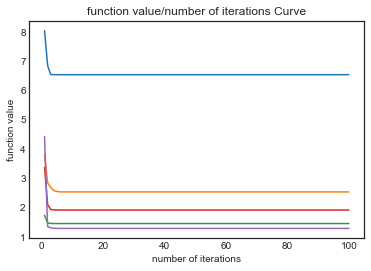

K=50


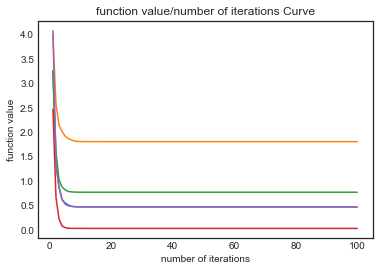

In [8]:
def f_avg(X, k):
    value = 0
    for i in X:
        value += i[0]**2 + i[1]**2
    return value/k

def CE(sd, k):
    np.random.seed(sd)
    x = [2, 2]
    num_ite = 0
    mu = x
    sig = np.identity(2)
    # For Plot
    dict_ite_f = {}
    while(True):
        num_ite += 1
        X = np.random.multivariate_normal(mu, sig, size=k)
        elite = X[(X[:,0]**2 + X[:,1]**2).argsort()][:int(k*0.2)]
        dict_ite_f[num_ite] = f_avg(elite, len(elite))
        sig = np.zeros((2,2))
        mu = np.mean(elite, axis=0)
        for i in elite:
            i = (i-mu).reshape((2,1))
            sig += i@i.T
        sig = sig/int(k*0.2)
        if num_ite == 100: break
    return dict_ite_f

def plot1(k):
    for i in range(5):
        dic = CE(i, k)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()
    
print("K=10")
plot1(10)
print("K=50")
plot1(50)

# For function 2 CE

K=10


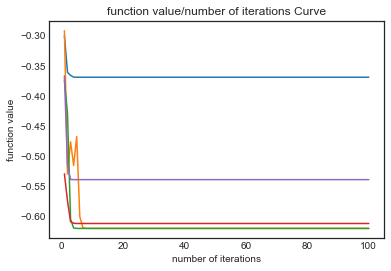

K=50


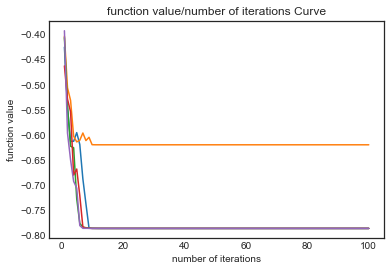

In [9]:
def f(x1, x2):
    return (-1-np.cos(12*(x1**2+x2**2)**0.5))/(0.5*(x1**2+x2**2)+2)

def f_avg(X, k):
    value = 0
    for i in X:
        value += f(i[0], i[1])
    return value/k

def CE(sd, k):
    np.random.seed(sd)
    x = [2, 2]
    num_ite = 0
    mu = x
    sig = np.identity(2)
    # For Plot
    dict_ite_f = {}
    while(True):
        num_ite += 1
        X = np.random.multivariate_normal(mu, sig, size=k)
        elite = X[(f(X[:,0], X[:,1])).argsort()][:int(k*0.2)]
        dict_ite_f[num_ite] = f_avg(elite, len(elite))
        sig = np.zeros((2,2))
        mu = np.mean(elite, axis=0)
        for i in elite:
            i = (i-mu).reshape((2,1))
            sig += i@i.T
        sig = sig/int(k*0.2)
        if num_ite == 100: break
    return dict_ite_f

def plot2(k):
    for i in range(5):
        dic = CE(i, k)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()

print("K=10")
plot2(10)
print("K=50")
plot2(50)

# For function 3 CE

K=10


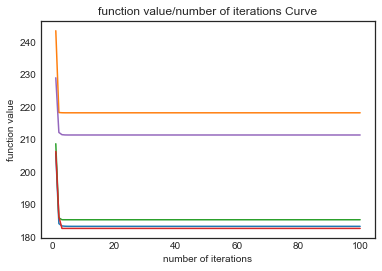

K=50


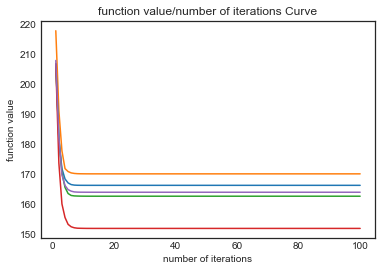

In [10]:
def f(x):
    value = 0
    for i in x:
        value += i**2
    return value

def f_avg(X, k):
    value = 0
    for i in X:
        value += f(i)
    return value/k

def CE(sd, k):
    np.random.seed(sd)
    x = [2]*50
    num_ite = 0
    mu = x
    sig = np.identity(50)
    # For Plot
    dict_ite_f = {}
    while(True):
        num_ite += 1
        X = np.random.multivariate_normal(mu, sig, size=k)
        elite = sorted(X, key=f)[:int(k*0.2)]
        dict_ite_f[num_ite] = f_avg(elite, len(elite))
        sig = np.zeros((50,50))
        mu = np.mean(elite, axis=0)
        for i in elite:
            i = (i-mu).reshape((50,1))
            sig += i@i.T
        sig = sig/int(k*0.2)
        if num_ite == 100: break
    return dict_ite_f

def plot3(k):
    for i in range(5):
        dic = CE(i, k)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()
    
print("K=10")
plot3(10)
print("K=50")
plot3(50)

# Question 1.5 SG

# For function 1 SG

K=10


<ipython-input-11-af12ca9d8bcc>:19: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mu, sig, size=k)


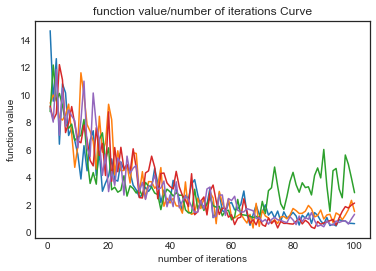

K=50


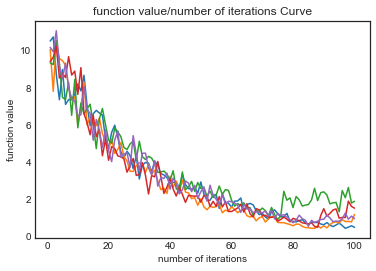

In [11]:
from numpy.linalg import inv

def f_avg(X, k):
    value = 0
    for i in X:
        value += i[0]**2 + i[1]**2
    return value/k

def SG(sd, k):
    np.random.seed(sd)
    x = [2, 2]
    num_ite = 0
    mu = x
    sig = np.identity(2)
    # For Plot
    dict_ite_f = {}
    while(True):
        num_ite += 1
        X = np.random.multivariate_normal(mu, sig, size=k)
        dict_ite_f[num_ite] = f_avg(X, k)
        
        new_mu = np.zeros((1,2))
        for x in X:
            new_mu += (inv(sig) @ ((x-mu).T)).T * (x[0]**2+x[1]**2)
        new_mu = new_mu/int(k)
        #new_mu = new_mu/np.linalg.norm(new_mu)
        
        new_sig = np.zeros((2,2))
        for x in X:
            dif = (x-mu).reshape(1,2)
            new_sig += ((-0.5*inv(sig)) + (0.5*inv(sig)@(dif).T@(dif)@inv(sig))) * (x[0]**2+x[1]**2)
        new_sig = new_sig/int(k)
        #new_sig = new_sig/np.linalg.norm(new_sig)
        
        mu = mu - 0.01*new_mu[0]
        sig = sig - 0.01*new_sig
        
        if num_ite == 100: break
    return dict_ite_f

def plot1(k):
    for i in range(5):
        dic = SG(i, k)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()
    
print("K=10")
plot1(10)
print("K=50")
plot1(50)

# For function 2 SG

K=10


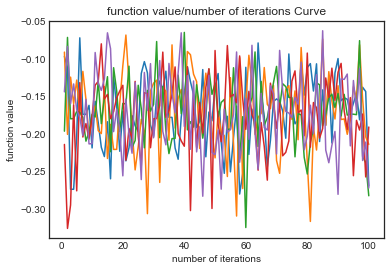

K=50


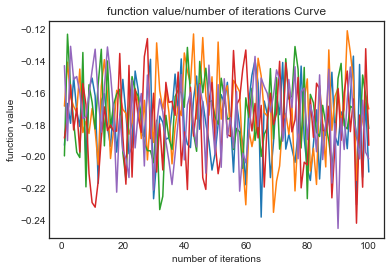

In [12]:
from numpy.linalg import inv

def f(x1, x2):
    return (-1-np.cos(12*(x1**2+x2**2)**0.5))/(0.5*(x1**2+x2**2)+2)

def f_avg(X, k):
    value = 0
    for i in X:
        value += f(i[0], i[1])
    return value/k

def SG(sd, k):
    np.random.seed(sd)
    x = [2, 2]
    num_ite = 0
    mu = x
    sig = np.identity(2)
    # For Plot
    dict_ite_f = {}
    while(True):
        num_ite += 1
        X = np.random.multivariate_normal(mu, sig, size=k)
        dict_ite_f[num_ite] = f_avg(X, k)
        
        new_mu = np.zeros((1,2))
        for x in X:
            new_mu += (inv(sig) @ ((x-mu).T)).T * f(x[0], x[1])
        new_mu = new_mu/int(k)
        #new_mu = new_mu/np.linalg.norm(new_mu)
        
        new_sig = np.zeros((2,2))
        for x in X:
            dif = (x-mu).reshape(1,2)
            new_sig += ((-0.5*inv(sig)) + (0.5*inv(sig)@(dif).T@(dif)@inv(sig))) * f(x[0], x[1])
        new_sig = new_sig/int(k)
        #new_sig = new_sig/np.linalg.norm(new_sig)
        
        mu = mu - 0.01*new_mu[0]
        sig = sig - 0.01*new_sig
        
        if num_ite == 100: break
    return dict_ite_f

def plot2(k):
    for i in range(5):
        dic = SG(i, k)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()
    
print("K=10")
plot2(10)
print("K=50")
plot2(50)

# For function 3 SG

K=10


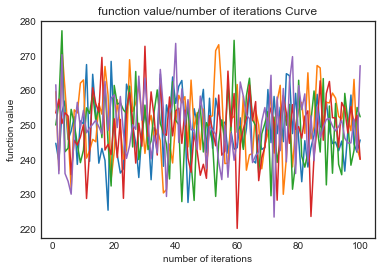

K=50


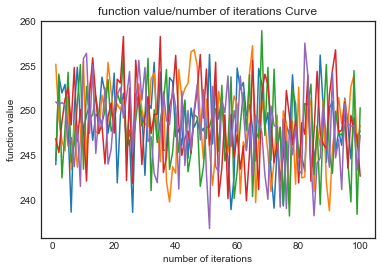

In [13]:
from numpy.linalg import inv

def f(x):
    value = 0
    for i in x:
        value += i**2
    return value

def f_avg(X, k):
    value = 0
    for i in X:
        value += f(i)
    return value/k

def SG(sd, k):
    np.random.seed(sd)
    x = 2*np.ones(50)
    num_ite = 0
    mu = x
    sig = np.identity(50)
    # For Plot
    dict_ite_f = {}
    while(True):
        num_ite += 1
        X = np.random.multivariate_normal(mu, sig, size=k)
        dict_ite_f[num_ite] = f_avg(X, k)
        
        new_mu = np.zeros((1,50))
        for i in X:
            new_mu += (inv(sig) @ ((i-mu).T)).T * f(i)
        new_mu = new_mu/int(k)
        new_mu = new_mu/np.linalg.norm(new_mu)
        
        new_sig = np.zeros((50,50))
        for i in X:
            dif = (i-mu).reshape((1, 50))
            new_sig += ((-0.5*inv(sig)) + (0.5*inv(sig)@(dif).T@(dif)@inv(sig))) * f(i)
        new_sig = new_sig/int(k)
        new_sig = new_sig / np.linalg.norm(new_sig)
        
        mu = mu - 0.01*new_mu[0]
        sig = sig - 0.01*new_sig
        
        if num_ite == 100: break
    return dict_ite_f

def plot3(k):
    for i in range(5):
        dic = SG(i, k)
        X = [key for key in dic]
        Y = [dic[key] for key in dic]
        plt.plot(X, Y)
    plt.xlabel("number of iterations")
    plt.ylabel("function value")
    plt.title("function value/number of iterations Curve")
    plt.show()
    
print("K=10")
plot3(10)
print("K=50")
plot3(50)

# Question 1.6

Firstly, when the function dimension is quite large, we should find gradient rather than sample, because for $f_3$ (with 50-dimension), it never converge to 0 (the optimal) within 100 steps while using sampling methods. (Actually, it never converfe to a value under 100.) However, while using gradient descent, it can almost converge to 0 within 100 steps.

Secondly, in terms of choosing the k (sample size) for CE, within a reasonable range, a larger k is better, as shown in the 6 graphs of the CE algorithm. With a larger k (50 compared with 10), the algorithm converges to a value which is closer to the optimal solution.

Thirdly, for the SG algorithm, if we observe it within only 100 steps, then it is quite unstable. However, with larger k (sample size), the algorithm becomes more stable. This is concluded from the difference of range of the y-axis. (when k=10, the range of y-axis is obviously larger than k=50.)

Finally, for the SA algorithm, a smaller initial temperature can lead to a more stable function behavior, and the function can converge earlier. (Compared with $f_1$ and $f_3$, $f_2$ is not quite obvious.) The reason might be that, with higher initial temperature T, there is more tolerance for a bad move, due to the probability function.

# Question 2

Assume that the separation property holds at the beginning of an arbitrary iteration i, and assume in interation i: the frontier is not empty, and the goal state has not been reached. (so that iteration i completes.)

In iteration i, the selected node is N. N will be poped from the frontier at the end of iteration i, and the successors of N will be pushed into the frontier. (if a successor is already explored or in the frontier, it will not be considered.)

Now, consider a path from the initial state to an unexplored state. By the induction hypothesis (the assumption made at the first paragraph), this path must contain at least one frontier node (at the beginning of the iteration i). If there are other nodes (except N) satisfy this, the separation property will automatically holds.

Therefore, in this path, consider there is only one node N in the frontier. In this path, mark the next node of N as M. M cannot be in the frontier, because by the third paragraph, the frontier only contains N.

Moreover, M cannot be in the explored set, because if it is in the explored set, it will be connected to the initial state, and after N (note that N is the only frontier node preceding M) is pushed into the explored set, the path from initial state to N to M to another unexplored state (this unexplored state is a neighbour of M) will contain no node in the frontier, which will violate the separation property. Therefore, M cannot be in the explored set.

M is not in the frontier, and M is not in the explored set. Thus, M will be added into the frontier (by the second paragraph). Then, the iteration can continue from i to i+1, and by mathematical induction, separation property holds.

# Question 3

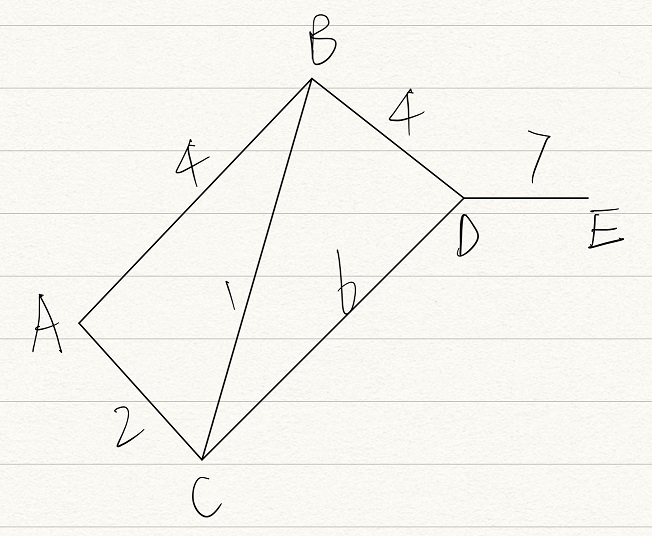

start node: A, goal node: E, and the cost for each edge is shown on the graph.

### Case 1

H(A) = 7

H(B) = 8

H(C) = 9

H(D) = 4

H(E) = 0

Shortest Path returned: A->C->B->D->E

### Case 2

H(A) = 35

H(B) = 40

H(C) = 45

H(D) = 20

H(E) = 0

Shortest Path returned: A->B->D->E

# Question 4

seed used: 0, 1, 2, 3, 4

Exp-1:

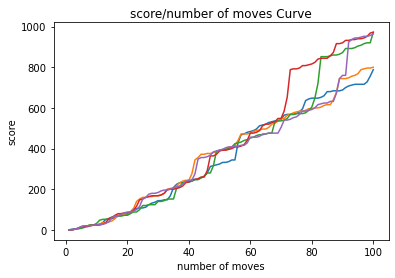

Exp-3:

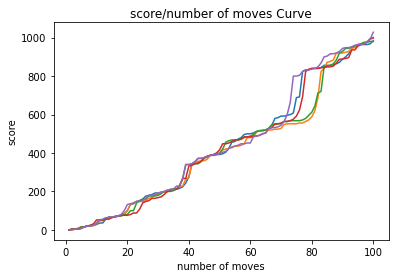

# Question 5

In order to compare the original version and the improved version, plot 5 runs for each version, with fixed seed from 0 to 4. Moreover, the x-aixs is not limited to 100 moves, so that the highest score of each run can be displayed, which can help when comparing.

Original Version:

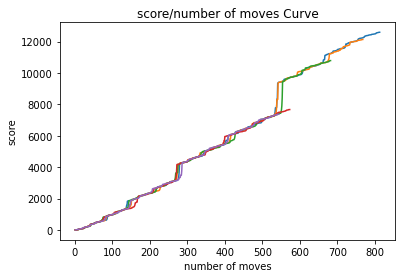

Improved Version:

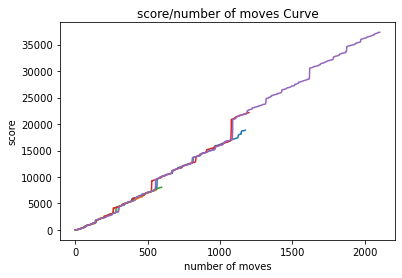

As shown in the above graphs, the improved version can reached much higher final score than the original version, which can prove superiority.

Moreover, the improved version can actually pass the second test (provided by the starter code).

# Question 6

$T_\pi(s_1) = \mathbb{E}[C(s_1)] + \mathbb{E}[C(s_2)] + \mathbb{E}[C(s_4)] + \mathbb{E}[C(s_6)]$

# Question 7

$T(s_1,a_{12})=\mathbb{E}[C(s_1)]+T(s_2)$

<br />

$T(s_1,a_{13})=\mathbb{E}[C(s_1)]+T(s_3)$

<br />

$T(s_1) = min(T(s_1,a_{12}), T(s_1,a_{13}))$

And due to the first two equations:

$T(s_1) = min(\mathbb{E}[C(s_1)]+T(s_2), \mathbb{E}[C(s_1)]+T(s_3))$

$T(s_1) = \mathbb{E}[C(s_1)] + min(T(s_2),T(s_3))$

# Question 8

$T(s_1,a_{13})=\mathbb{E}[C(s_1)]+T(s_3)$

Since $T(s_3)$ does not change, we only care about $\mathbb{E}[C(s_1)]$

We want to update the $\mathbb{E}[C(s_1)]$ with a learning rate $\alpha$, which will decrease with the number of iterations, such as:

$\alpha = \frac{10}{9+N}$, where N is the number of iterations.

The update method is:

$\mathbb{E}[C(s_1)]_{next} \gets \mathbb{E}[C(s_1)]_{now} + \alpha_{next}(C(s_1)_{next}-\mathbb{E}[C(s_1)]_{now})$

At the beginning, $\mathbb{E}[C(s_1)]_{now}$ is the old expectation from "Suppose you have lived here for long enough to form good estimates of $T(s_1)$."

,and $C(s_1)_{next}$ is the first time you spent at $s_1$ after new construction.

To be more specific, $\mathbb{E}[C(s_1)]_{now}$ and $\mathbb{E}[C(s_1)]_{next}$ here, for example, if the expectation follows the normal distribution, are the mean $\mu$ values.

Then, just repeat the update method after the stop criterion is met.

To write down the update method in a more formal way:

$\mathbb{E}[C(s_1)]_{k} \gets \mathbb{E}[C(s_1)]_{k-1} + \alpha_{k}(C(s_1)_{k}-\mathbb{E}[C(s_1)]_{k-1})$